# Natural Language Processing (NLP)

**Natural language processing (NLP)** refers to computational techniques involving language.

## Word Cloud (Tag Cloud)

One approach to visualizing words and counts is **word clouds**, which artistically lay out the words with sizes proportional to their counts.

If you ever are forced to create a word cloud, `think about whether you can make the axes convey something`. For example, imagine that, for each of some collection of data science–related buzzwords, you have two numbers between 0 and 100—the first representing how frequently it appears in job postings, the second how frequently it appears on resumes.

In [2]:
# (word, job postings frequency, resume frequency)

data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

def text_size(total: int) -> float:
    """
    equals 8 if total is 0 and 28 if total is 200
    """
    return 8 + total / 200 * 20

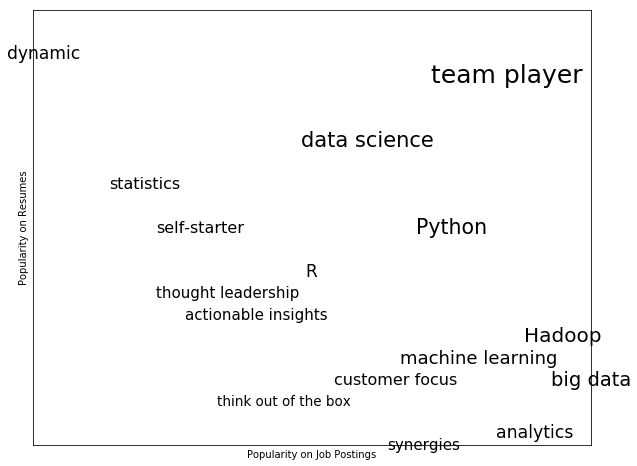

In [10]:
plt.figure(figsize=(10,8))

for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word, 
             ha='center', va='center',
            size=text_size(job_popularity + resume_popularity))

plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])
plt.savefig('images/nlp1.png')
plt.show();

Horizontal position indicates posting popularity and vertical position indicates resume popularity, which produces a visualization that conveys a few insights.

## Example 1: 

Create a WordCloud and customize it as you see fit. This tool will be quite handy for exploring text data and making your report more lively.

In [9]:
#!pip install wordcloud

    100% |████████████████████████████████| 163kB 288kB/s 


In [11]:
# the latest version with the ability to mask the cloud into any shape of your choice 
# requires a different method of installation as below

!git clone https://github.com/amueller/word_cloud.git
#!cd word_cloud
#!pip install .

Cloning into 'word_cloud'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 3684 (delta 4), reused 8 (delta 4), pack-reused 3673
Receiving objects: 100% (3684/3684), 67.65 MiB | 3.33 MiB/s, done.
Resolving deltas: 100% (2047/2047), done.
Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


In [14]:
!pwd
import os
os.chdir('word_cloud')
!pwd
!pip install .

/Users/ksatola/Documents/git/Data-Science-Templates
/Users/ksatola/Documents/git/Data-Science-Templates/word_cloud
Processing /Users/ksatola/Documents/git/Data-Science-Templates/word_cloud
  Running setup.py bdist_wheel for wordcloud ... done
  Stored in directory: /private/var/folders/qk/0l3zx9w11959pqp8tr5s_1780000gn/T/pip-ephem-wheel-cache-90fzr7ge/wheels/8e/f3/3b/bc8d4a0f370ad1547b19db3b18c02e6b2a360059be6f1fa877
Successfully built wordcloud
  Found existing installation: wordcloud 1.5.0
    Uninstalling wordcloud-1.5.0:
      Successfully uninstalled wordcloud-1.5.0


In [15]:
os.chdir('..')
!pwd

/Users/ksatola/Documents/git/Data-Science-Templates


In [ ]:
# Dataset - Wine Reviews
# Details: https://www.kaggle.com/zynicide/wine-reviews/downloads/wine-reviews.zip/4

In [17]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Load in the dataframe
df = pd.read_csv("data/wine-reviews/winemag-data-130k-v2.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [24]:
lenv = len(df.variety.unique())

In [31]:
print(f"There are:")
print(f"- {df.shape[0]} observations and {df.shape[1]} features in this dataset.")
print(f"- {len(df.variety.unique())} types of wine in this dataset such as {', '.join(df.variety.unique()[0:5])}...")
print(f"- {len(df.country.unique())} countries producing wine in this dataset such as {', '.join(df.country.unique()[0:5])}...")
      

There are:
- 129971 observations and 13 features in this dataset.
- 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir...
- 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France...


In [32]:
df[["country", "description", "points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [34]:
# Groupby by country
country = df.groupby("country")
country

## Resources

- [Generating WordClouds in Python](https://www.datacamp.com/community/tutorials/wordcloud-python)